In [2]:
using Random, Distributions

In [3]:
function draw(a, b; N=100000)
    
    x = rand(Uniform(0,1), N)

    ϵ = rand(Normal(0.0, 0.5), N)

    cst = b*ones(N)
    y = cst + a*x + ϵ

    return (;x, y)
end

draw (generic function with 1 method)

In [4]:
d = draw(2.5, 0.4)

(x = [0.4350151469510595, 0.08755034603683709, 0.7899973864385258, 0.874088056801624, 0.5390167090357885, 0.05268300781460711, 0.6849597032810697, 0.5311955089564023, 0.9306257211897302, 0.32248421501998736  …  0.2588353894645916, 0.7417784023896656, 0.8092200504615876, 0.5190211606478282, 0.6000380119119957, 0.5648923596703321, 0.0015548807316835278, 0.4521861812769513, 0.4812921764078668, 0.6066125513888361], y = [1.2256866668714648, 0.2873909810504014, 2.634126516050436, 2.9683244531366575, 1.4618986157618603, 0.442396654137024, 2.062893880898062, 2.3547164496024235, 2.727925334162077, 1.2383591211327187  …  0.9671189696726858, 1.6844711756478992, 2.788742524047944, 2.548515550216168, 1.2136192348849302, 1.5791053251490803, -0.06762960681892466, 1.5619694453249342, 1.6916089126075584, 2.528741548802491])

In [5]:
using ForwardDiff

In [6]:
function loss(d, θ)

    N = length(d.x)
    x = d.x
    y = d.y
    a = θ[1]
    b = θ[2]
    
    ll = sum( (a*x[i] + b - y[i])^2 for i in 1:N) / N
    return ll 

end

loss (generic function with 1 method)

In [7]:
loss2min = θ -> loss(d, θ)

#14 (generic function with 1 method)

In [8]:
θ0 = [2.5; 0.4]
loss2min(θ0)
abs(loss2min(θ0))

0.2507676879915558

In [9]:
function gd(f, θ0, λ; N=1000, τ_η=1e-10, τ_ϵ=1e-10)
    
    θ1 = θ0
    local θ1
    
    for n in 1:N
        θ1 = θ0 - λ*ForwardDiff.gradient(f, θ0)

        η = maximum(abs, θ1 - θ0)
        ϵ = abs(f(θ0))

        # @show(n, ϵ, η)
        
        if η < τ_η || ϵ < τ_ϵ
            break
        end

        θ0 = θ1
    end
    return θ1
end

gd (generic function with 1 method)

In [10]:
θ0 = [2, 0.5]
λ = 0.1
gd(loss2min, θ0, λ)

2-element Vector{Float64}:
 2.49663379758633
 0.4012365762766747

In [11]:
function bestL(θstar, θ0)
    λstar = 0.0  # Start with a default
    for j in 0.1:0.05:1
        θ = gd(loss2min, θ0, j)
        η = maximum(abs, θstar - θ)
        if η > 1e-1 
            λstar = j 
            break
        end
    end
    return λstar
end


bestL (generic function with 1 method)

In [12]:
θstar = [2.5; 0.4]
bestL(θstar, θ0)

0.8

In [13]:
rand(d.x) 

0.7432706835733192

In [14]:
import ForwardDiff: derivative

In [15]:
function ξfun(d, a, b)

    ii = rand(1:length(d.x))
    x = d.x
    y = d.y
    emploss(a, b, x, y) = (a*x[ii] + b - y[ii])^2

    ξ = emploss(a, b, x, y) 
    A = derivative(u->emploss(u, b, x, y), a)
    B = derivative(u->emploss(a, u, x, y), b)

    return ξ, A, B
end

ξfun (generic function with 1 method)

In [16]:
ξfun(d, 2.5, 0.4)

(0.17158079780681698, 0.6597242955925863, 0.8284462512603143)

In [17]:
ξfun

ξfun (generic function with 1 method)

In [37]:
function sgd(d, a0, b0; λ=0.01, N=100000, τ_η=1e-10)

    a1 = a0
    b1 = b0
    nend = 0

    for n in 1:N
            
        ξ, A, B = ξfun(d, a0, b0)

        a1 = a0 - λ*A
        b1 = b0 - λ*B

        ηa = maximum(abs, a1 - a0)
        ηb = maximum(abs, b1 - b0)
        η = max(ηa, ηb)

        # @show n η
        
        if η < τ_η
            break
        end

        a0 = a1
        b0 = b1
        nend = n

    end
    return a1, b1, nend
end

sgd (generic function with 1 method)

In [38]:
sgd(d, 0.0, 0.0)

(2.417446929230463, 0.3974855172219214, 100000)

In [1]:
import Pkg; Pkg.add("SpecialFunctions")

    Updating registry at `C:\Users\eliot\.julia\registries\General.toml`
   Resolving package versions...
   Installed SpecialFunctions ─ v2.5.1
    Updating `C:\Users\eliot\.julia\environments\v1.11\Project.toml`
  [276daf66] + SpecialFunctions v2.5.1
    Updating `C:\Users\eliot\.julia\environments\v1.11\Manifest.toml`
  [276daf66] ↑ SpecialFunctions v2.5.0 ⇒ v2.5.1
Precompiling project...
   4146.1 ms  ✓ SpecialFunctions
   2033.8 ms  ✓ HypergeometricFunctions
   2519.4 ms  ✓ ColorVectorSpace → SpecialFunctionsExt
   5743.5 ms  ✓ ForwardDiff
   4819.4 ms  ✓ StatsFuns
   3467.7 ms  ✓ DifferentiationInterface → DifferentiationInterfaceForwardDiffExt
   1518.2 ms  ✓ NLSolversBase
   2357.8 ms  ✓ LineSearches
   8333.2 ms  ✓ Distributions
   3843.1 ms  ✓ Optim
   1642.0 ms  ✓ Distributions → DistributionsTestExt
  11 dependencies successfully precompiled in 43 seconds. 251 already precompiled.


In [2]:
using SpecialFunctions: erfc

std_norm_cdf(x::T) where {T <: Real} = 0.5 * erfc(-x/sqrt(2))
std_norm_cdf(x::Array{T}) where {T <: Real} = 0.5 .* erfc(-x./sqrt(2))

function tauchen(N::Integer, ρ::T1, σ::T2, μ=zero(promote_type(T1, T2)), n_std::T3=3) where {T1 <: Real, T2 <: Real, T3 <: Real}
    # Get discretized space
    a_bar = n_std * sqrt(σ^2 / (1 - ρ^2))
    y = range(-a_bar, stop=a_bar, length=N)
    d = y[2] - y[1]

    # Get transition probabilities
    Π = zeros(promote_type(T1, T2), N, N)
    for row = 1:N
        # Do end points first
        Π[row, 1] = std_norm_cdf((y[1] - ρ*y[row] + d/2) / σ)
        Π[row, N] = 1 - std_norm_cdf((y[N] - ρ*y[row] - d/2) / σ)

        # fill in the middle columns
        for col = 2:N-1
            Π[row, col] = (std_norm_cdf((y[col] - ρ*y[row] + d/2) / σ) -
                           std_norm_cdf((y[col] - ρ*y[row] - d/2) / σ))
        end
    end

    yy = y .+ μ / (1 - ρ) # center process around its mean (wbar / (1 - rho)) in new variable

    (;transitions=Π, values=yy)

end

tauchen (generic function with 3 methods)

In [12]:
ar1 = tauchen(200, 0.95, 0.1, 0.1, 3)

(transitions = [0.33283268994867254 0.035774340757924517 … 0.0 0.0; 0.30019619386767143 0.03439273186444319 … 0.0 0.0; … ; 1.7641418264378537e-77 8.866118616048715e-77 … 0.03439273186444325 0.3001961938676714; 3.1752918163376773e-78 1.612793496199978e-77 … 0.035774340757924517 0.33283268994867254], values = 1.0392310771694757:0.009655969073673595:2.960768922830521)

In [23]:
for j in 1:200
    rowval = sum(ar1.transitions[j,i] for i in 1:200)
    if rowval > 1.0 + 1e-3 || rowval < 1.0 - 1e-3 
        print("not goood")
        break
    end
end


In [32]:
"Creates an instance of the firm exit model."
function create_exit_model(;
    n=200, # productivity grid size
    ρ=0.95, μ=0.1, ν=0.1, # persistence, mean and volatility
    β=0.98, s=100.0 # discount factor and scrap value
    )
    mc = tauchen(n, ρ, ν, μ)
    z_vals, Q = mc.values, mc.transitions
    return (; n, z_vals, Q, β, s)
end

create_exit_model

In [33]:
(; n, z_vals, Q, β, s) = create_exit_model()  


(n = 200, z_vals = 1.0392310771694757:0.009655969073673595:2.960768922830521, Q = [0.33283268994867254 0.035774340757924517 … 0.0 0.0; 0.30019619386767143 0.03439273186444319 … 0.0 0.0; … ; 1.7641418264378537e-77 8.866118616048715e-77 … 0.03439273186444325 0.3001961938676714; 3.1752918163376773e-78 1.612793496199978e-77 … 0.035774340757924517 0.33283268994867254], β = 0.98, s = 100.0)

In [ ]:
# state: current productivity (y)
# control: operate OR exit 
# reward: profit

# value function for the firm
# V(y) = y + β*E[V(yprime)]
# value function is the current profit + beta and the continuation value
# where next value function is uncertain due to productivity being a random variable
# we can use the markov chain transition matrix to compute the expected value of next period's VF
# the decision rule is a 0 (exit) or 1 (operate) object

In [73]:
function bellman_step(V_O, V_E)

    (; n, z_vals, Q, β, s) = create_exit_model()  

    n_V_O = zeros(n)
    n_V_E = zeros(n)
    n_x = zeros(Bool, n)

    # exit
    for i in 1:n

        cont_O = sum(Q[i,j]*V_O[j] for j in 1:n) # operate
        n_V_O[i] = z_vals[i] + β*cont_O

        cont_E = 0 # exit
        n_V_E[i] = s

        n_V = max(n_V_E[i], n_V_O[i])

        if n_V == n_V_O[i]
            n_x[i] = true
        else
            n_x[i] = false
        end
        
    end

    return (; n_V_O, n_V_E, n_x)
end

bellman_step (generic function with 1 method)

In [75]:
V_O_0 = ones(200)*100
V_E_0 = zeros(200)
bellman_step(V_O_0, V_E_0)

(n_V_O = [99.0392310771696, 99.04888704624324, 99.058543015317, 99.06819898439065, 99.07785495346431, 99.08751092253794, 99.0971668916117, 99.10682286068534, 99.11647882975902, 99.12613479883267  …  100.8738652011676, 100.88352117024127, 100.89317713931493, 100.90283310838859, 100.91248907746228, 100.92214504653595, 100.93180101560961, 100.94145698468331, 100.95111295375696, 100.96076892283062], n_V_E = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0  …  100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], n_x = Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [76]:
distance(a::Tuple{Vector, Vector}, b::Tuple{Vector, Vector})  = max(
    maximum(abs.(a[1]-b[1])),
    maximum(abs.(a[2]-b[2])),
)

distance (generic function with 1 method)

In [77]:
function value_function_iteration(V_O_0, V_E_0; N=1000, τ=1e-8)
    
    local  V_O_1, V_E_1, x_1

    for i in 1:N 

        V_O_1, V_E_1, x_1 = bellman_step(V_O_0, V_E_0)

        η = distance( (V_O_0, V_E_0), (V_O_1, V_E_1) )

        @show (i, η)
        
        if η < τ
            break
        end

        V_O_0 = V_O_1
        V_E_0 = V_E_1 
        
    end

    return (; V_O_1, V_E_1, x_1)
end

value_function_iteration (generic function with 1 method)

In [78]:
V_O, V_E, x = value_function_iteration(V_O_0, V_E_0)

(i, η) = (1, 100.0)
(i, η) = (2, 0.8745055727127777)
(i, η) = (3, 0.8039392154116598)
(i, η) = (4, 0.7420196309352036)
(i, η) = (5, 0.6863557675144136)
(i, η) = (6, 0.6357303259703997)
(i, η) = (7, 0.5893834611589739)
(i, η) = (8, 0.5467788295507745)
(i, η) = (9, 0.5075064367206039)
(i, η) = (10, 0.47123561199263975)
(i, η) = (11, 0.437689625121493)
(i, η) = (12, 0.40663079574326844)
(i, η) = (13, 0.37785115443597306)
(i, η) = (14, 0.35116625055586326)
(i, η) = (15, 0.3264108470714433)
(i, η) = (16, 0.3034358018924195)
(i, η) = (17, 0.28210572637031817)
(i, η) = (18, 0.26229717151420573)
(i, η) = (19, 0.24389718427180185)
(i, η) = (20, 0.22680213103180336)
(i, η) = (21, 0.21091671933263)
(i, η) = (22, 0.1961531702695254)
(i, η) = (23, 0.18243050812162664)
(i, η) = (24, 0.1696739430832821)
(i, η) = (25, 0.15781432936759643)
(i, η) = (26, 0.1467876853816108)
(i, η) = (27, 0.1365347658084488)
(i, η) = (28, 0.12700067768642498)
(i, η) = (29, 0.11813453422513476)
(i, η) = (30, 0.10988914132

(V_O_1 = [86.94196176607045, 87.02159767318138, 87.10498448391486, 87.19201959354565, 87.28258199104064, 87.37653506135277, 87.47372952826018, 87.57400643871564, 87.6772000962614, 87.7831408613774  …  112.21685913863661, 112.32279990375257, 112.42599356129821, 112.52627047175383, 112.62346493866123, 112.71741800897325, 112.80798040646829, 112.89501551609904, 112.9784023268325, 113.05803823394346], V_E_1 = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0  …  100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], x_1 = Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [79]:
using Plots

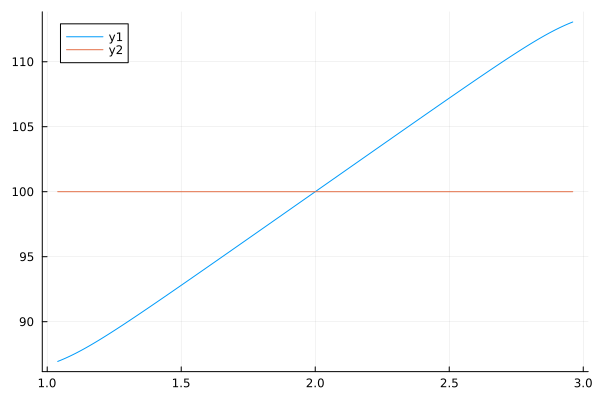

In [80]:
plot(z_vals, V_O)
plot!(z_vals, V_E)

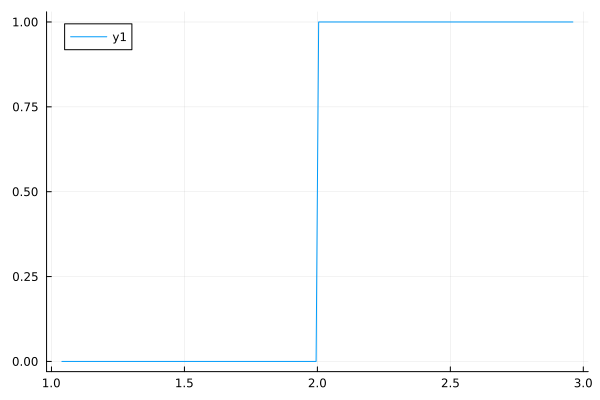

In [81]:
plot(z_vals, x)

In [ ]:
@time value_function_iteration(V_O_0, V_E_0)
# since the control is just 0 or 1, we can use policy iteration


(i, η) = (1, 100.0)
(i, η) = (2, 0.8745055727127777)
(i, η) = (3, 0.8039392154116598)
(i, η) = (4, 0.7420196309352036)
(i, η) = (5, 0.6863557675144136)
(i, η) = (6, 0.6357303259703997)
(i, η) = (7, 0.5893834611589739)
(i, η) = (8, 0.5467788295507745)
(i, η) = (9, 0.5075064367206039)
(i, η) = (10, 0.47123561199263975)
(i, η) = (11, 0.437689625121493)
(i, η) = (12, 0.40663079574326844)
(i, η) = (13, 0.37785115443597306)
(i, η) = (14, 0.35116625055586326)
(i, η) = (15, 0.3264108470714433)
(i, η) = (16, 0.3034358018924195)
(i, η) = (17, 0.28210572637031817)
(i, η) = (18, 0.26229717151420573)
(i, η) = (19, 0.24389718427180185)
(i, η) = (20, 0.22680213103180336)
(i, η) = (21, 0.21091671933263)
(i, η) = (22, 0.1961531702695254)
(i, η) = (23, 0.18243050812162664)
(i, η) = (24, 0.1696739430832821)
(i, η) = (25, 0.15781432936759643)
(i, η) = (26, 0.1467876853816108)
(i, η) = (27, 0.1365347658084488)
(i, η) = (28, 0.12700067768642498)
(i, η) = (29, 0.11813453422513476)
(i, η) = (30, 0.10988914132

(V_O_1 = [86.94196176607045, 87.02159767318138, 87.10498448391486, 87.19201959354565, 87.28258199104064, 87.37653506135277, 87.47372952826018, 87.57400643871564, 87.6772000962614, 87.7831408613774  …  112.21685913863661, 112.32279990375257, 112.42599356129821, 112.52627047175383, 112.62346493866123, 112.71741800897325, 112.80798040646829, 112.89501551609904, 112.9784023268325, 113.05803823394346], V_E_1 = [100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0  …  100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0], x_1 = Bool[0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  1, 1, 1, 1, 1, 1, 1, 1, 1, 1])